In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### GRID DETECTION
Grid detection is often used to calibrate cameras and track motion.

OpenCV has built in methods for tracking grids and chessboard like patterns.

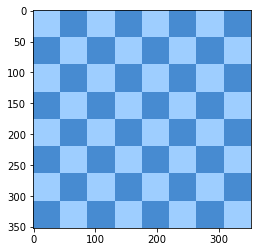

In [20]:
flat_chess = cv2.imread('Imagess/flat_chessboard.png')
plt.imshow(flat_chess)

In [21]:
#This method is actually specifically looking for the chess or checker board pattern. Usual grids do not go well with this method.

found,corners = cv2.findChessboardCorners(flat_chess,(7,7))

#The second argument is the grid size, 8*8 is not chosen as the model cannot identify the last ones.
#(There is grid pattern only inside the last border, the function requires the corner to be fully surrounded)

if (found):
    print("We found corners")
else:
    print("No corners found")

We found corners


In [22]:
#Coordinaates of the corners:
corners

array([[[ 43.500004,  43.500004]],

       [[ 87.5     ,  43.5     ]],

       [[131.5     ,  43.5     ]],

       [[175.5     ,  43.5     ]],

       [[219.5     ,  43.5     ]],

       [[263.5     ,  43.5     ]],

       [[307.5     ,  43.5     ]],

       [[ 43.499996,  87.50001 ]],

       [[ 87.5     ,  87.5     ]],

       [[131.5     ,  87.5     ]],

       [[175.5     ,  87.5     ]],

       [[219.5     ,  87.5     ]],

       [[263.5     ,  87.5     ]],

       [[307.5     ,  87.49999 ]],

       [[ 43.500004, 131.5     ]],

       [[ 87.5     , 131.5     ]],

       [[131.5     , 131.5     ]],

       [[175.5     , 131.5     ]],

       [[219.5     , 131.5     ]],

       [[263.5     , 131.5     ]],

       [[307.5     , 131.5     ]],

       [[ 43.499996, 175.5     ]],

       [[ 87.5     , 175.5     ]],

       [[131.5     , 175.5     ]],

       [[175.5     , 175.5     ]],

       [[219.5     , 175.5     ]],

       [[263.5     , 175.5     ]],

       [[307.5     , 175.5  

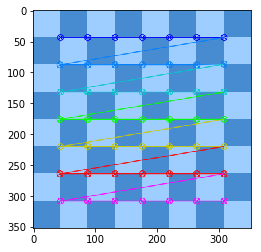

In [23]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)
plt.imshow(flat_chess)

#This basically marks the corners, and rows in different colors.
#It connects them with zigzag lines.

### CONTOUR DETECTON
Contours are defined as a curve joining all the continuous points (along the boundary) having the same color or intensity.

They are a useful tool for shape analysis and object detection/recognition.

OpenCV has a built in contour finder that can also help us differentiate between internal and external contours.

In [30]:
img = cv2.imread('Imagess/internal_external.png',0)
img.shape

(652, 1080)

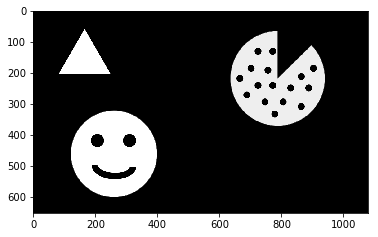

In [31]:
plt.imshow(img, cmap='gray')

In the above picture, internal contours are the eyes and mouth of the smiley face, and the dots on the pizza or pacman(or whatever that is)

The external contours are the shapes themselves, the triangle, circle and the pacman

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [32]:
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [33]:
type(contours)

list

In [34]:
len(contours)

22

In [35]:
type(hierarchy)

numpy.ndarray

In [36]:
hierarchy.shape

(1, 22, 4)

In [37]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [40]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

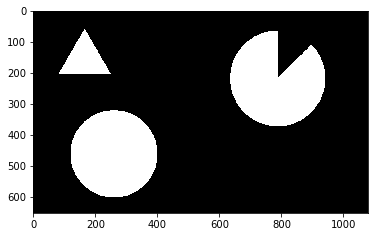

In [41]:
plt.imshow(external_contours, cmap = 'gray')

In [42]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

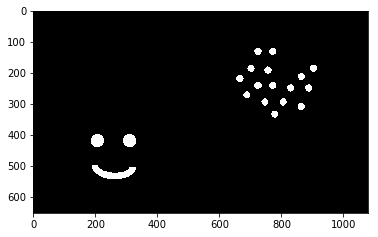

In [43]:
plt.imshow(image_internal,cmap='gray')